In [1]:
import keras

C:\Users\apple\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
__________

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'Downloads/people_others/train'
validation_dir = 'Downloads/people_others/validation'

# rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  # directory
        target_size=(150, 150),   # input shape (resized to 150x150)
        batch_size=20,
        class_mode='binary')   # binary labels

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 5482 images belonging to 2 classes.
Found 1844 images belonging to 2 classes.


In [7]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=270,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=92)

Epoch 1/30
270/270 [==============================] - 441s 2s/step - loss: 0.6311 - acc: 0.6439 - val_loss: 0.6305 - val_acc: 0.7109
Epoch 2/30
270/270 [==============================] - 441s 2s/step - loss: 0.5517 - acc: 0.7265 - val_loss: 0.5858 - val_acc: 0.7321
Epoch 3/30
270/270 [==============================] - 463s 2s/step - loss: 0.5030 - acc: 0.7594 - val_loss: 0.5171 - val_acc: 0.8022
Epoch 4/30
270/270 [==============================] - 514s 2s/step - loss: 0.4648 - acc: 0.7880 - val_loss: 0.5365 - val_acc: 0.7864
Epoch 5/30
270/270 [==============================] - 491s 2s/step - loss: 0.4392 - acc: 0.8031 - val_loss: 0.4687 - val_acc: 0.8370
Epoch 6/30
270/270 [==============================] - 469s 2s/step - loss: 0.4231 - acc: 0.8111 - val_loss: 0.4781 - val_acc: 0.8418
Epoch 7/30
270/270 [==============================] - 458s 2s/step - loss: 0.4094 - acc: 0.8191 - val_loss: 0.4517 - val_acc: 0.8168
Epoch 8/30
270/270 [==============================] - 458s 2s/step - 

In [8]:
model.save('people_others1')

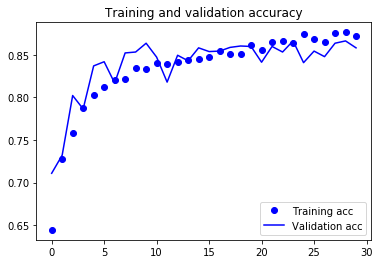

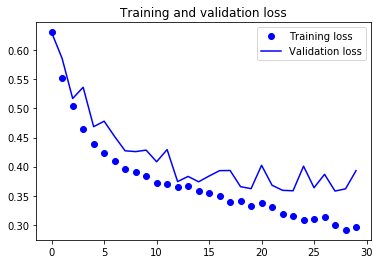

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [1]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
model = load_model('people_others1')

test_dir = 'downloads/people_others/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=92)
print('test loss:', test_loss)
print('test acc:', test_acc)

C:\Users\apple\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Found 1843 images belonging to 2 classes.
test loss: 0.42093269980472064
test acc: 0.8298913052548533
